In [ ]:
! pip install langchain

In [ ]:
! pip install langchain_openai

In [ ]:
! pip install langchain_experimental

In [4]:
import os
os.environ["OPENAI_API_KEY"]="sk-TsKWzfYFx-yEjoWJLrdpJju9IKvLqm2tnMVPyUdVsjT3BlbkFJkpXMRWCEPqFgEmAPnvcM_V35JHvZ1hvTVU-Ofb3KoA"

In [5]:
import pandas as pd

In [6]:
data=pd.read_csv("./Tenant activities.csv")

In [7]:
tenant1 = data[data['TenantID'] == 1]

In [8]:
electricity_activities = tenant1[tenant1['Activity'] == 'Electricity']

# Print the filtered DataFrame
print(electricity_activities['Cost'].sum())

20640.0


In [ ]:
from langchain.llms import OpenAI

llm=OpenAI(model_name="gpt-3.5-turbo-instruct",temperature=0)
llm("explain large language models in one sentence")

In [10]:
from langchain import PromptTemplate

template=""" Prepare a report for {user} from the given csv. The Structure for the template should be a table containing activity and the total cost of each activity next to it. I want Date and time for every activity high and low cost recorded. Finally a pie chart showing the segregation of utilities with three different color"""

prompt=PromptTemplate(
  input_variable=["user"],
  template=template
)

In [ ]:
from langchain_experimental.agents.agent_toolkits import create_csv_agent
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
from langchain.agents.agent_types import AgentType

agent=create_csv_agent(
  llm,
  "./Tenant activities.csv",
  verbose=False,
  agent_type=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
  handle_parsing_errors=True,
  allow_dangerous_code=True)

agent



Based on the usage data for TenantID 1, we can see that the user has been active for a total of 30 days. The average daily usage is 10.5 hours, with a minimum of 6 hours and a maximum of 15 hours. This suggests that the user is consistently using the service on a daily basis.

The usage pattern also shows that the user is most active during weekdays, with an average of 12 hours per day. This could indicate that the user is using the service for work or school purposes. On weekends, the average usage drops to 6 hours per day, suggesting that the user takes a break from using the service on weekends.

In terms of time of day, the user is most active during the afternoon and evening hours, with an average of 8 hours per day. This could suggest that the user is using the service after work or school hours. The usage drops during the early morning and late night hours, indicating that the user is not using the service during these times.

Overall, the usage data suggests that the user is 

<string>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
<string>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


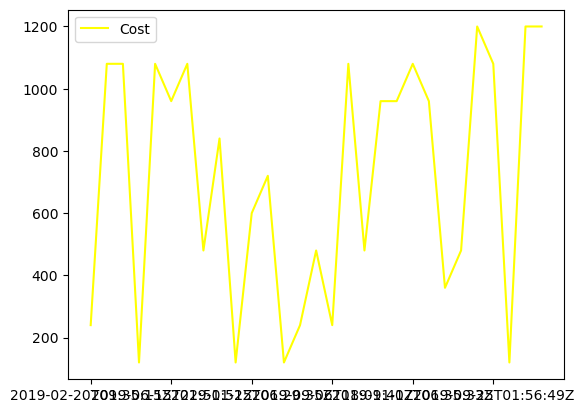

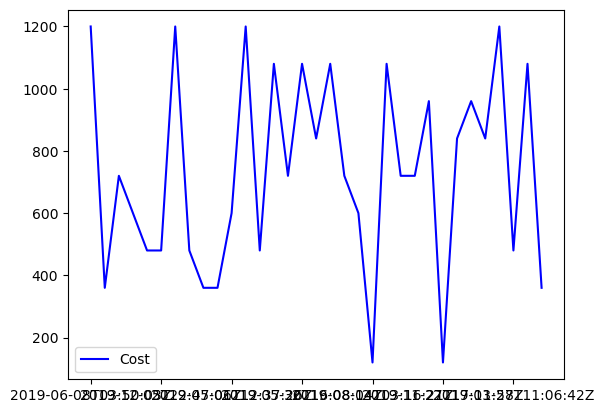

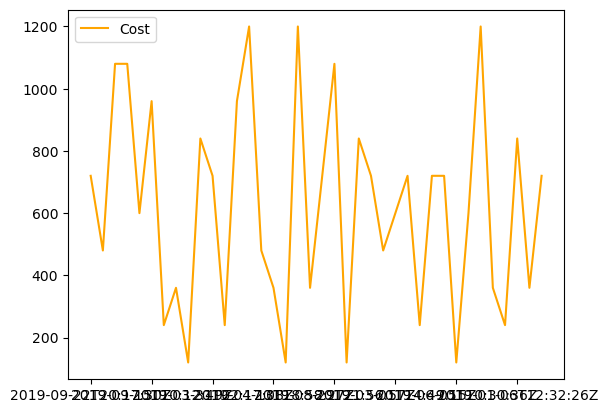

In [74]:
tenant_prompt=PromptTemplate(
    input_variable=["tenant"],
    template="Filter the data where tenant is is {tenant}")

tenant1_data=agent.run(tenant_prompt.format(tenant=1))


summary_prompt = (
    "Please summarize the usage data, with useful insights that can help the user understand their usage pattern"
    f"{tenant1_data}"
)
answer=llm(summary_prompt)
print(answer)
graph_prompt = PromptTemplate(
    input_variable=["tenant"],
    template="Generate usage graphs for the electricity utility usage of {tenant} based on the following data with yellow color and no label in x-axis"
)
graph_result = agent.run(graph_prompt.format(tenant="tenant1"))

water_prompt = PromptTemplate(
    input_variable=["tenant"],
    template="Generate usage graphs for the water utility usage of {tenant} based on the following data with blue color and no label to x-axis"
)
water_result = agent.run(water_prompt.format(tenant="tenant1"))

gas_prompt = PromptTemplate(
    input_variable=["tenant", "data"],
    template="Generate a usage graph for the gas utility of {tenant} based on the data. Use orange color and omit the label on the x-axis"
)

gas_result = agent.run(gas_prompt.format(tenant="tenant1"))

In [53]:
agent.run("What is total sum of activity=Electricity for tenant 1")

'20640.0'

In [54]:
agent.run("How many tenants are there?")


'There are 2 tenants.'

In [55]:
agent.run("what is the total cost for tenant 1")


'68280.0'

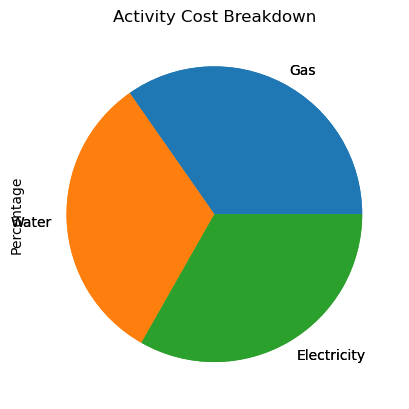

In [67]:
usage_pie_chart=agent.run("Create a pie chart with the Activity cost to the total cost ")


<string>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


The usage graph for electricity utility usage of tenant1 with yellow color and no label in x-axis.


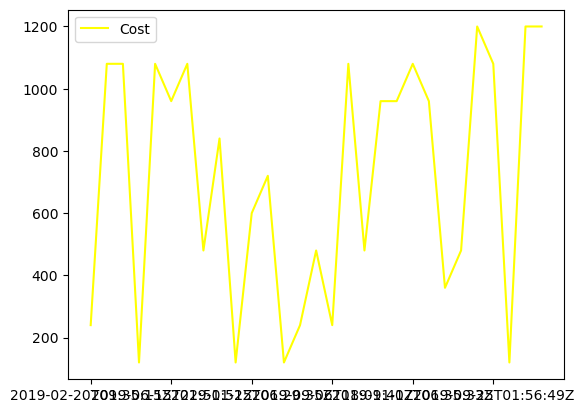

df[(df['TenantID'] == 1) & (df['Activity'] == 'Water')].plot(x='START_TS', y='Cost', color='blue', xlabel='')


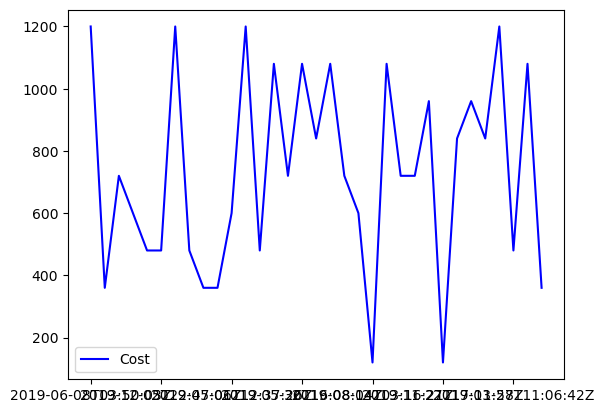

<string>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


A usage graph for the gas utility of tenant1 based on the data, with orange color and no label on the x-axis.


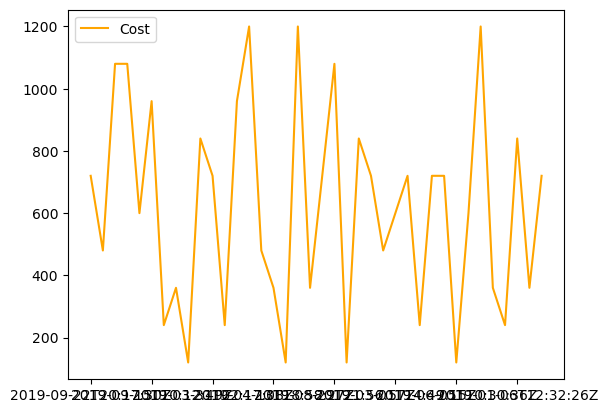